##### Importing libraries and framework

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NUMBER_OF_VARS_TO_USE = 5

#### Prepare the data

In [4]:
# Load the data from the CSV file into a DataFrame
data = pd.read_csv('datasets/listings_preprocessed.csv')
selected_vars = pd.read_csv('datasets/high_correlations_price.csv').values.tolist()
selected_vars = selected_vars[0:NUMBER_OF_VARS_TO_USE]
 
for i, var in enumerate(selected_vars):
    selected_vars[i] = var[0]

# Separate the input features (X) and target variable (y)
X = data.loc[:, selected_vars]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Align the columns of the training and testing sets
X_train, X_test = X_train.align(X_test, join='left', axis=1)

# Fill missing values in the training set with the mean of each column
X_train.fillna(X_train.mean(), inplace=True)

# Fill missing values in the test set with the mean of the corresponding columns in the training set
X_test.fillna(X_train.mean(), inplace=True)

# Fill remaining NaN values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [5]:
# Create a support vector regression model
svr_model = SVR(kernel='linear')

# Train the model using the training data with the selected features
svr_model.fit(X_train, y_train)

# Make predictions using the test data and the selected features
y_pred_svr = svr_model.predict(X_test)

#### Display the coefficients and performance metrics

#### Support Vector Regression (SVR) with a linear kernel does have coefficients. The coefficients represent the weights of the features in the model. The SVR model, when using a linear kernel, finds a linear relationship between the input features and the target variable.

In [7]:
# Calculate the mean squared error and R^2 score for the predictions
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print the coefficients
for feature, coef in zip(selected_vars, svr_model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

# Print the results
print("Performance metrics")
print("Support Vector Regression - Mean squared error:", mse_svr)
print("Support Vector Regression - R^2 score:", r2_svr)

bedrooms: 71.2398
room_type_Private room: -23.6297
calculated_host_listings_count_entire_homes: 0.4930
property_type_Private room in rental unit: -32.3773
minimum_nights: -0.8547
Performance metrics
Support Vector Regression - Mean squared error: 9059.934147950364
Support Vector Regression - R^2 score: 0.4504269751896215


#### Plot the support vector regression model

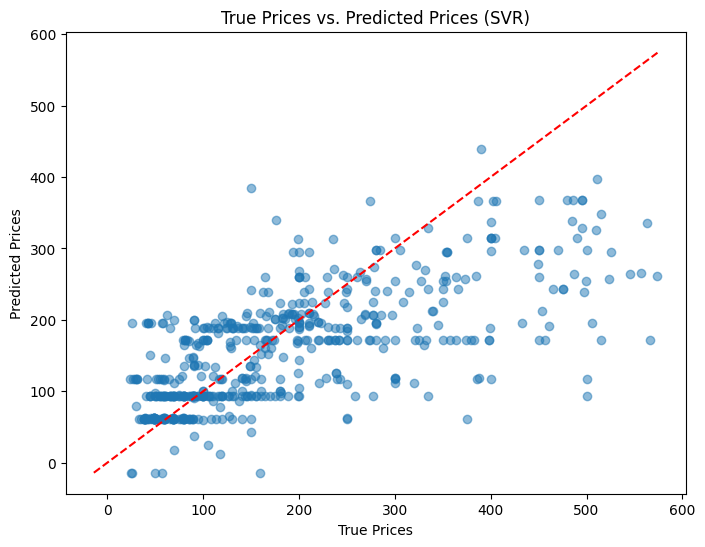

In [8]:
def plot_svr_predictions(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.xlabel('True Prices')
    plt.ylabel('Predicted Prices')
    plt.title('True Prices vs. Predicted Prices (SVR)')

    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

    plt.show()

plot_svr_predictions(y_test, y_pred_svr)